# Logistic Regression Model

In [1]:

import pandas as pd
import numpy as np
from sklearn import preprocessing

trainingDf = pd.read_csv('./train_dataset.csv.xls')

print(trainingDf.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [2]:
print("============COLUMNS WITH EMPTY VALUE=============")
print(trainingDf.columns[trainingDf.isna().any()].tolist())


============COLUMNS WITH EMPTY VALUE=============
['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [3]:
#Dropping loan_id
trainingDf = trainingDf.drop(columns=['Loan_ID'])

#Populating rows with null data with default values
trainingDf['Gender'] = trainingDf['Gender'].fillna('unknown')
trainingDf['Married'] = trainingDf['Married'].fillna('unknown')
trainingDf['Self_Employed'] = trainingDf['Self_Employed'].fillna('unknown')
trainingDf['Dependents'] = trainingDf['Dependents'].fillna(0)

#Dropping rows with empty values for following columns 'LoanAmount', 'Loan_Amount_Term', 'Credit_History'
trainingDf = trainingDf[trainingDf['LoanAmount'].notna()]
trainingDf = trainingDf[trainingDf['Loan_Amount_Term'].notna()]
trainingDf = trainingDf[trainingDf['Credit_History'].notna()]

trainingDf['Dependents'].replace(
    to_replace=['3+'],
    value='4',
    inplace=True
)

In [4]:

print("============COLUMNS WITH EMPTY VALUE=============")
print(trainingDf.columns[trainingDf.isna().any()].tolist())
print("Remaining rows after dropping data:", len(trainingDf.index))

============COLUMNS WITH EMPTY VALUE=============
[]
Remaining rows after dropping data: 529


In [5]:
print("============UNIQUE VALUE FOR CATEGORICAL DATA=============")
print("Gender: ", trainingDf['Gender'].unique())
print("Married: ", trainingDf['Married'].unique())
print("Education: ", trainingDf['Education'].unique())
print("Self_Employed: ", trainingDf['Self_Employed'].unique())
print("Property_Area: ", trainingDf['Property_Area'].unique())
print('\n')

============UNIQUE VALUE FOR CATEGORICAL DATA=============
Gender:  ['Male' 'Female' 'unknown']
Married:  ['Yes' 'No' 'unknown']
Education:  ['Graduate' 'Not Graduate']
Self_Employed:  ['No' 'Yes' 'unknown']
Property_Area:  ['Rural' 'Urban' 'Semiurban']




In [6]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

train, test = train_test_split(trainingDf, test_size=0.2, random_state=23)
print(train.head())
X_train, y_train = train.copy().drop(columns=['Loan_Status']), train['Loan_Status']
X_test, y_test = test.copy().drop(columns=['Loan_Status']), test['Loan_Status']

Categorical_columns = ["Gender", "Married", "Education", "Self_Employed", "Property_Area"]
Numerical_columns = ["Dependents", "ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term", "Credit_History"]

Categorical_X_train = X_train[Categorical_columns]
Categorical_X_test = X_test[Categorical_columns]

Numerical_X_train = X_train[Numerical_columns]
Numerical_X_test = X_test[Numerical_columns]

encoder = preprocessing.OneHotEncoder()
encoder.fit(Categorical_X_train)
Categorical_X_train_encoded = encoder.transform(Categorical_X_train).toarray()
Categorical_X_test_encoded = encoder.transform(Categorical_X_test).toarray()

print(Numerical_X_train.head())

standard_Scaler = preprocessing.MinMaxScaler()
standard_Scaler.fit(Numerical_X_train)
Numerical_X_train_encoded = standard_Scaler.transform(Numerical_X_train)
Numerical_X_test_encoded = standard_Scaler.transform(Numerical_X_test)

y_encoder = preprocessing.LabelEncoder()
y_encoder.fit(y_train)
Y_train_encoded = y_encoder.transform(y_train)
Y_test_encoded = y_encoder.transform(y_test)

Combined_X_train_encoded = np.concatenate((Categorical_X_train_encoded, Numerical_X_train_encoded), axis=1)
#print(Combined_X_train_encoded)
Combined_X_test_encoded = np.concatenate((Categorical_X_test_encoded, Numerical_X_test_encoded), axis=1)

     Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
330    Male      No          1      Graduate            No             4384   
410  Female      No          1  Not Graduate           Yes             3867   
217    Male     Yes          0      Graduate            No             3727   
143    Male     Yes          0      Graduate            No             2698   
525    Male     Yes          2      Graduate           Yes            17500   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
330             1793.0       117.0             360.0             1.0   
410                0.0        62.0             360.0             1.0   
217             1775.0       131.0             360.0             1.0   
143             2034.0       122.0             360.0             1.0   
525                0.0       400.0             360.0             1.0   

    Property_Area Loan_Status  
330         Urban           Y  
410     Semiurban           

### 1) Logistic Regression Model

In [7]:
#model using Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score
import numpy as np

print("============LOGISTIC REGRESSION MODEL=============")
lr_model = LogisticRegression()
lr_model.fit(Combined_X_train_encoded,Y_train_encoded)
y_predicted = lr_model.predict(Combined_X_test_encoded)
print("Accuracy is ", accuracy_score(y_predicted,Y_test_encoded))
print("Mean Square Error : ", mean_squared_error(Y_test_encoded, y_predicted))
print(confusion_matrix(y_predicted,Y_test_encoded))
print("Classification Report : ")
print(classification_report(Y_test_encoded, y_predicted))

============LOGISTIC REGRESSION MODEL=============
Accuracy is  0.8207547169811321
Mean Square Error :  0.1792452830188679
[[23  0]
 [19 64]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      0.55      0.71        42
           1       0.77      1.00      0.87        64

    accuracy                           0.82       106
   macro avg       0.89      0.77      0.79       106
weighted avg       0.86      0.82      0.81       106



### 2) 10-fold cross validation to generalize the Logistic Regression Model

In [8]:
# To find list of accuracy and MSE values of the model using K-fold cross validation

from sklearn.model_selection import KFold

print("============LOGISTIC REGRESSION MODEL USING 10-FOLD CROSS VALIDATION=============")
kf = KFold(n_splits=10)
X = trainingDf.copy().drop(columns=['Loan_Status'])
y = trainingDf['Loan_Status']

#re-split the processed data into X and y then encode before doing 10-cross validation
Categorical_X = X[Categorical_columns]
#print(Categorical_X)
Numerical_X = X[Numerical_columns]

encoder = preprocessing.OneHotEncoder()
encoder.fit(Categorical_X)
Categorical_X_encoded = encoder.transform(Categorical_X).toarray()

#print(Categorical_X_encoded)

standard_Scaler.fit(Numerical_X)
Numerical_X_encoded = standard_Scaler.transform(Numerical_X)
#print(Numerical_X_encoded)

y_encoder.fit(y)
Y_encoded = y_encoder.transform(y)

Combined_X_encoded = np.concatenate((Categorical_X_encoded, Numerical_X_encoded), axis=1)

#print(Combined_X_encoded)

idx = 0
for train_indices, test_indices in kf.split(Combined_X_encoded):
    start_train, stop_train = train_indices[0], train_indices[-1]+1
    start_test, stop_test = test_indices[0], test_indices[-1]+1
    
    lr_model.fit(Combined_X_encoded[start_train:stop_train], Y_encoded[start_train:stop_train])
    pred = lr_model.predict(Combined_X_encoded[start_test:stop_test])

    idx+=1
    print("Accuracy for batch ", idx, " : ", accuracy_score(Y_encoded[start_test:stop_test], pred))
    print("Mean Square Error for batch ", idx, " : ", mean_squared_error(Y_encoded[start_test:stop_test], pred))

============LOGISTIC REGRESSION MODEL USING 10-FOLD CROSS VALIDATION=============
Accuracy for batch  1  :  0.7735849056603774
Mean Square Error for batch  1  :  0.22641509433962265
Accuracy for batch  2  :  0.8490566037735849
Mean Square Error for batch  2  :  0.1509433962264151
Accuracy for batch  3  :  0.7547169811320755
Mean Square Error for batch  3  :  0.24528301886792453
Accuracy for batch  4  :  0.7735849056603774
Mean Square Error for batch  4  :  0.22641509433962265
Accuracy for batch  5  :  0.8301886792452831
Mean Square Error for batch  5  :  0.16981132075471697
Accuracy for batch  6  :  0.7547169811320755
Mean Square Error for batch  6  :  0.24528301886792453
Accuracy for batch  7  :  0.8490566037735849
Mean Square Error for batch  7  :  0.1509433962264151
Accuracy for batch  8  :  0.8679245283018868
Mean Square Error for batch  8  :  0.1320754716981132
Accuracy for batch  9  :  0.8301886792452831
Mean Square Error for batch  9  :  0.16981132075471697
Accuracy for batch  1

### 3) Naïve Bayes Classifier for Numerical Attributes

In [9]:
#Calssify using Naive Bayes for numerical attributes 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report 

print("============NAIVE BAYES CLASSIFIER FOR NUMERICAL ATTRIBUTES=============")

GNB = GaussianNB()

GNB.fit(Numerical_X_train_encoded, Y_train_encoded)

print("Classification report for train datasets:")
print(classification_report(Y_train_encoded, GNB.predict(Numerical_X_train_encoded)))
print("***************************************************************************")
print("Classification report for test datasets:")
print(classification_report(Y_test_encoded, GNB.predict(Numerical_X_test_encoded)))

============NAIVE BAYES CLASSIFIER FOR NUMERICAL ATTRIBUTES=============
Classification report for train datasets:
              precision    recall  f1-score   support

           0       0.77      0.47      0.58       121
           1       0.82      0.94      0.88       302

    accuracy                           0.81       423
   macro avg       0.79      0.71      0.73       423
weighted avg       0.80      0.81      0.79       423

***************************************************************************
Classification report for test datasets:
              precision    recall  f1-score   support

           0       0.92      0.55      0.69        42
           1       0.77      0.97      0.86        64

    accuracy                           0.80       106
   macro avg       0.84      0.76      0.77       106
weighted avg       0.83      0.80      0.79       106



### 4) 10-fold cross validation to generalize the Naïve Bayes Classifier for Numerical Attributes

In [10]:
# To find list of accuracy and MSE values of the model using K-fold cross validation

from sklearn.model_selection import KFold

kf = KFold(n_splits=10)

print("============NAIVE BAYES CLASSIFIER FOR NUMERICAL ATTRIBUTES USING 10-FOLD CROSS VALIDATION=============")

idx = 0
for train_indices, test_indices in kf.split(Numerical_X_encoded):
    start_train, stop_train = train_indices[0], train_indices[-1]+1
    start_test, stop_test = test_indices[0], test_indices[-1]+1
    
    GNB.fit(Numerical_X_encoded[start_train:stop_train], Y_encoded[start_train:stop_train])
    pred = GNB.predict(Numerical_X_encoded[start_test:stop_test])

    idx+=1
    print("Accuracy for batch ", idx, " : ", accuracy_score(Y_encoded[start_test:stop_test], pred))
    print("Mean Square Error for batch ", idx, " : ", mean_squared_error(Y_encoded[start_test:stop_test], pred))

============NAIVE BAYES CLASSIFIER FOR NUMERICAL ATTRIBUTES USING 10-FOLD CROSS VALIDATION=============
Accuracy for batch  1  :  0.7547169811320755
Mean Square Error for batch  1  :  0.24528301886792453
Accuracy for batch  2  :  0.8490566037735849
Mean Square Error for batch  2  :  0.1509433962264151
Accuracy for batch  3  :  0.7547169811320755
Mean Square Error for batch  3  :  0.24528301886792453
Accuracy for batch  4  :  0.7547169811320755
Mean Square Error for batch  4  :  0.24528301886792453
Accuracy for batch  5  :  0.8113207547169812
Mean Square Error for batch  5  :  0.18867924528301888
Accuracy for batch  6  :  0.7547169811320755
Mean Square Error for batch  6  :  0.24528301886792453
Accuracy for batch  7  :  0.8301886792452831
Mean Square Error for batch  7  :  0.16981132075471697
Accuracy for batch  8  :  0.8490566037735849
Mean Square Error for batch  8  :  0.1509433962264151
Accuracy for batch  9  :  0.8113207547169812
Mean Square Error for batch  9  :  0.1886792452830188

### 5) Naïve Bayes Classifier for Categorical Attributes

In [11]:
from sklearn.metrics import classification_report
from sklearn.naive_bayes import CategoricalNB

print("============NAIVE BAYES CLASSIFIER FOR CATEGORICAL ATTRIBUTES=============")

NB = CategoricalNB() 

NB.fit(Categorical_X_train_encoded, Y_train_encoded)
print(classification_report(Y_test_encoded, NB.predict(Categorical_X_test_encoded)))

============NAIVE BAYES CLASSIFIER FOR CATEGORICAL ATTRIBUTES=============
              precision    recall  f1-score   support

           0       0.47      0.19      0.27        42
           1       0.62      0.86      0.72        64

    accuracy                           0.59       106
   macro avg       0.54      0.52      0.50       106
weighted avg       0.56      0.59      0.54       106



### 6) 10-fold cross validation to generalize the Naïve Bayes Classifier for Categorical Attributes

In [12]:
from sklearn.model_selection import KFold

print("============NAIVE BAYES CLASSIFIER FOR CATEGORICAL ATTRIBUTES USING 10-FOLD CROSS VALIDATION=============")

kf = KFold(n_splits=10)

idx = 0
for train_indices, test_indices in kf.split(Categorical_X_encoded):
    start_train, stop_train = train_indices[0], train_indices[-1]+1
    start_test, stop_test = test_indices[0], test_indices[-1]+1
    
    GNB.fit(Categorical_X_encoded[start_train:stop_train], Y_encoded[start_train:stop_train])
    pred = GNB.predict(Categorical_X_encoded[start_test:stop_test])

    idx+=1
    print("Accuracy for batch ", idx, " : ", accuracy_score(Y_encoded[start_test:stop_test], pred))
    print("Mean Square Error for batch ", idx, " : ", mean_squared_error(Y_encoded[start_test:stop_test], pred))

============NAIVE BAYES CLASSIFIER FOR CATEGORICAL ATTRIBUTES USING 10-FOLD CROSS VALIDATION=============
Accuracy for batch  1  :  0.41509433962264153
Mean Square Error for batch  1  :  0.5849056603773585
Accuracy for batch  2  :  0.2830188679245283
Mean Square Error for batch  2  :  0.7169811320754716
Accuracy for batch  3  :  0.41509433962264153
Mean Square Error for batch  3  :  0.5849056603773585
Accuracy for batch  4  :  0.2830188679245283
Mean Square Error for batch  4  :  0.7169811320754716
Accuracy for batch  5  :  0.3018867924528302
Mean Square Error for batch  5  :  0.6981132075471698
Accuracy for batch  6  :  0.3584905660377358
Mean Square Error for batch  6  :  0.6415094339622641
Accuracy for batch  7  :  0.37735849056603776
Mean Square Error for batch  7  :  0.6226415094339622
Accuracy for batch  8  :  0.33962264150943394
Mean Square Error for batch  8  :  0.660377358490566
Accuracy for batch  9  :  0.32075471698113206
Mean Square Error for batch  9  :  0.6792452830188679

## Testing
The original plan was to test the model using the provided test dataset, calculate the confusion matrix, TP, FP, etc. for each of them, and make comparisons, then discuss their differences in the report. But since the test dataset does not have 'Loan_Status', we cannot proceed as planned. Instead, we would just use the data from the testing phase.



The below were the old strategies, discarded.
1. Test the models using the provided testing data. Treat the provided testing data as real life scenarios.

    The provide testing dataset does not have 'Loan_Status'.  :( \
    Just for right now, I will assume all cases in there are approved cases, and see how it go.

In [13]:
# Load the testing data
testingDF = pd.read_csv('./test_Y3wMUE5_7gLdaTN.csv.xls')
print(testingDF.head())

# Check the provided testing data and do some processing if necessary
print("Columns with empty value in the Testing data:")
print(testingDF.columns[testingDF.isna().any()].tolist())

testingDF = testingDF.drop(columns=['Loan_ID'])
testingDF['Gender'] = testingDF['Gender'].fillna('unknown')
testingDF['Self_Employed'] = testingDF['Self_Employed'].fillna('unknown')
testingDF['Dependents'] = testingDF['Dependents'].fillna(0)

testingDF['Dependents'].replace(
    to_replace=['3+'],
    value='4',
    inplace=True
)

testingDF = testingDF[testingDF['LoanAmount'].notna()]
testingDF = testingDF[testingDF['Loan_Amount_Term'].notna()]
testingDF = testingDF[testingDF['Credit_History'].notna()]

testingDF['Loan_Status'] = 'Y'  # A bad assumption, but I will see how it go. 

print("\nTesting Data:")
print(testingDF.head())

print("\nRemaining rows in testing data after dropping:", len(testingDF.index))

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001015   Male     Yes          0      Graduate            No   
1  LP001022   Male     Yes          1      Graduate            No   
2  LP001031   Male     Yes          2      Graduate            No   
3  LP001035   Male     Yes          2      Graduate            No   
4  LP001051   Male      No          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
3             2340               2546       100.0             360.0   
4             3276                  0        78.0             360.0   

   Credit_History Property_Area  
0             1.0         Urban  
1             1.0         Urban  
2             1.0         Urban  
3             NaN     

2. Currently we had 3 models trained:
- Logistic regression model -- 'lr_mode', 
- Gaussian Naive Bayes -- 'GNB', 
- Naive Bayes classifier for categorical features -- 'NB'. 

We will evuluate these models using the testing data set.
There will be warning because our y only have 1 value, which is also a warning to us that we can't just make assumptions to the dataset.

In [14]:
test_X, test_y = testingDF.copy().drop(columns=['Loan_Status']), testingDF['Loan_Status']
test_categorical = testingDF[Categorical_columns]
test_numerical = testingDF[Numerical_columns]

# use the same encoders from previous, and in the same format
test_y_encoded = y_encoder.transform(test_y)
test_categorical_encoded = encoder.transform(test_categorical).toarray()
test_numerical_encoded = standard_Scaler.transform(test_numerical)
test_X_combined = np.concatenate((test_categorical_encoded, test_numerical_encoded), axis=1)

print("\nLogistic regression model:")
y_predicted_logistic = lr_model.predict(test_X_combined)
print("Accuracy is ", accuracy_score(y_predicted_logistic,test_y_encoded))
print("Mean Square Error : ", mean_squared_error(test_y_encoded, y_predicted_logistic))
print("Classification Report : ")
print(classification_report(test_y_encoded, y_predicted_logistic)) 

print("\nNaive Bayes classifier for categorical features:")
print("Accuracy is ", accuracy_score(NB.predict(test_categorical_encoded),test_y_encoded))
print("Mean Square Error : ", mean_squared_error(test_y_encoded, NB.predict(test_categorical_encoded)))
print("Classification Report : ")
print(classification_report(test_y_encoded, NB.predict(test_categorical_encoded))) 


Logistic regression model:
Accuracy is  0.823170731707317
Mean Square Error :  0.17682926829268292
Classification Report : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.82      0.90       328

    accuracy                           0.82       328
   macro avg       0.50      0.41      0.45       328
weighted avg       1.00      0.82      0.90       328


Naive Bayes classifier for categorical features:
Accuracy is  0.850609756097561
Mean Square Error :  0.14939024390243902
Classification Report : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.85      0.92       328

    accuracy                           0.85       328
   macro avg       0.50      0.43      0.46       328
weighted avg       1.00      0.85      0.92       328



/home/hblei/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hblei/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hblei/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hblei/.local/lib/python3.8/site-packages/sklearn/metrics/_cla

### Playground
Just some random staff

In [15]:
testingDF = testingDF.drop(columns=['Loan_Status'])

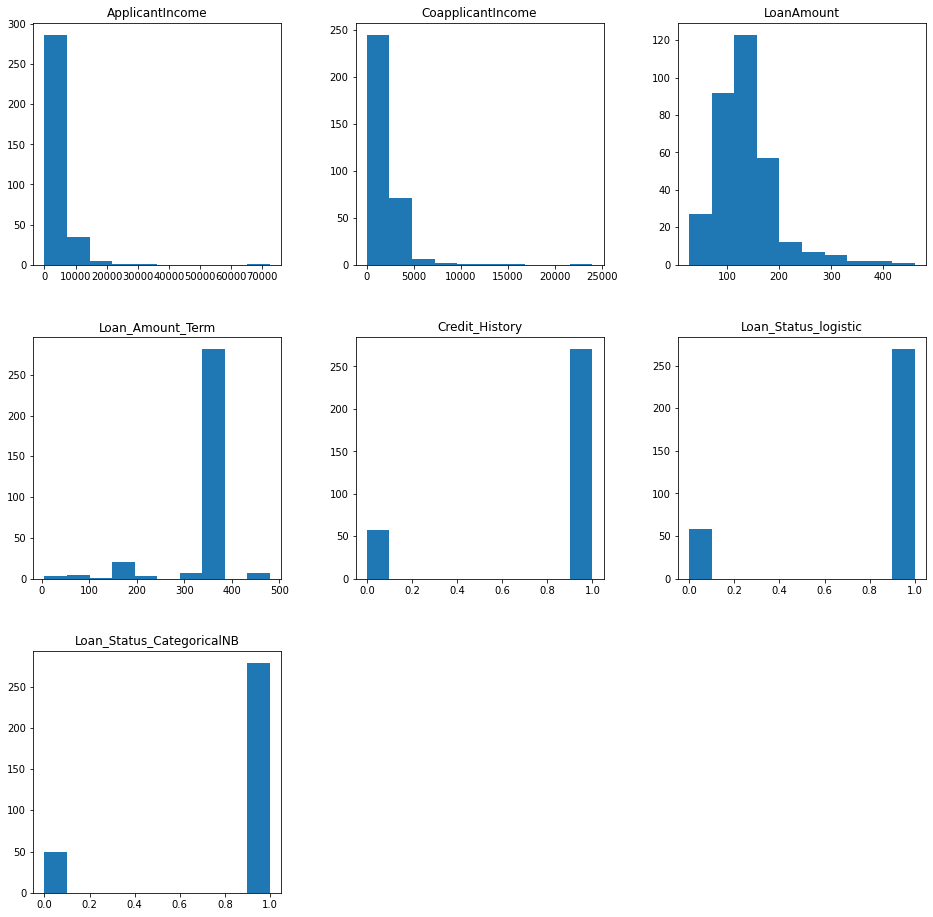

In [16]:
y_predicted_logistic = lr_model.predict(test_X_combined)
y_predicted_NB_categorical = NB.predict(test_categorical_encoded)
testingDF['Loan_Status_logistic'] = y_predicted_logistic
testingDF['Loan_Status_CategoricalNB'] = y_predicted_NB_categorical
_ = testingDF.hist(figsize=(16,16), grid=False)

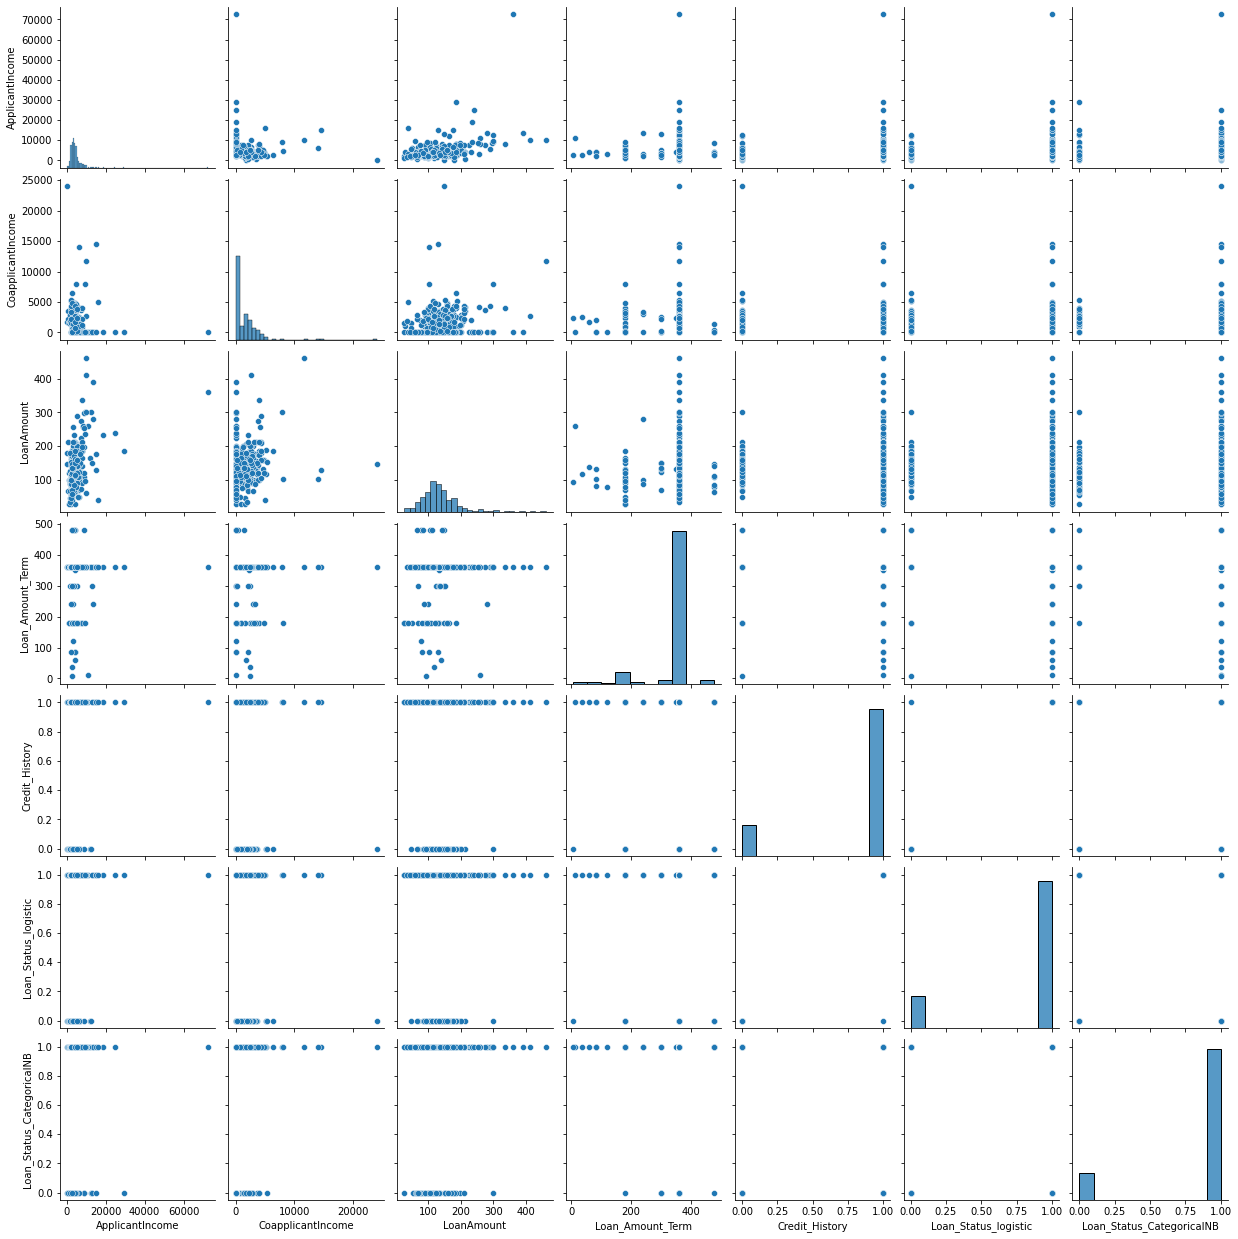

In [17]:
import seaborn as sns
_ = sns.pairplot(testingDF)

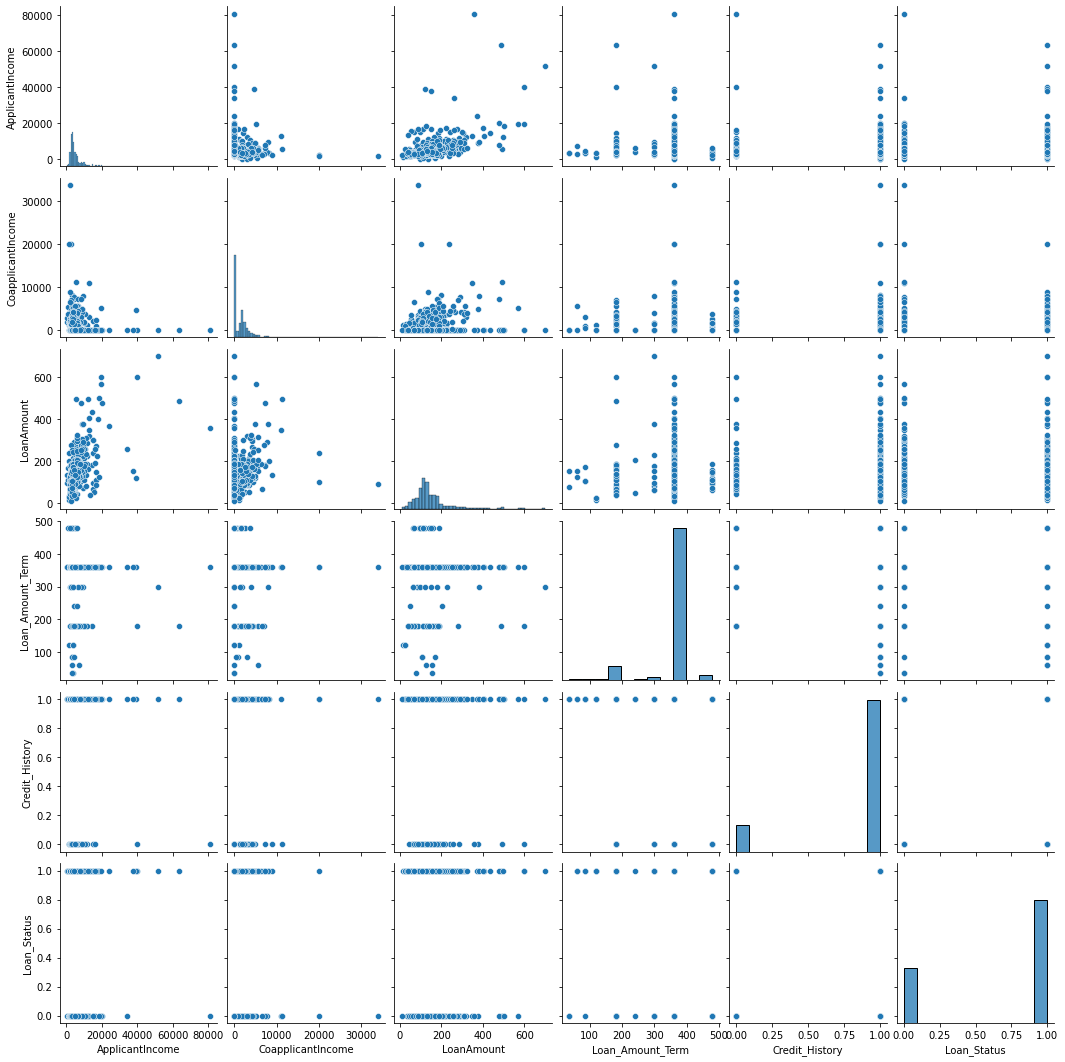

In [18]:
trainingDf['Loan_Status'] = y_encoder.transform(trainingDf['Loan_Status'])
_ = sns.pairplot(trainingDf)